**Exercise 2**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns


### Activation Functions

In [ ]:
def sigmoid(z): # the sigmoid function
  X = np.exp(z)
  return X / (1 + X)

def sigmoid_der(z): # derivative of the sigmoid function
  A = sigmoid(z)
  return A * (1 - A)

In [ ]:
def tanh(z): # the tanh function
  return np.tanh(z)

def tanh_der(z): # derivative of the tanh function
    X = np.tanh(z)
    return 1 - X ** 2

In [ ]:
def relu(z): # the relu function
  return np.maximum(0.0, z)

def relu_der(z): # derivative of the relu function
    return np.greater(z, 0).astype(int)

In [ ]:
# dictionary of [activation function, derivative of the activation function]
activation_functions_dict = {
    "sigmoid": [sigmoid, sigmoid_der],
    "tanh": [tanh, tanh_der],
    "relu": [relu, relu_der]
}

### The cost function:

In [ ]:
def MSE_calculation(A,Y):
    m = A.shape[1]
    E = Y - A
    cost = np.sum(E ** 2)
    return cost / (2 * m)

##**Part A: One Layer**

### Initialize:
We don't use inialize with zero as zero values can be bad as we discussed in class.
Instead we inialize with random numbers.

Initialize w and b for the both layers according to the number of the features and number of neurons in the layers.

W should be initialized randomly to small values (otherwise, values at the activation functions could be at the flat part).

* n_x = number of input features

* n_h = number of neurons in the hidden layer

* n_y = number of output


In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    return {
    "W1": np.random.randn(n_h, n_x) * 0.01,
    "b1": np.zeros([n_h, 1]),
    "W2": np.random.randn(n_y, n_h) * 0.01,
    "b2": np.zeros([n_y, 1])
    }

### Forward Propagate:

* X - input (samples * features)
* parameters - dictionary containing parameters (output of initialization function)
* activation_function - one of the activation function: sigmoid, tanh or relu
* A2 - The sigmoid output of the second activation
* cache - dictionary containing "Z1", "A1", "Z2" and "A2"

Retuns: A2 (the final value) and the cache of values

In [ ]:
def forward_propagation(X, parameters, activation_function):
    
    # Hidden Layer
    Z1 = parameters["W1"].dot(X) + parameters["b1"]
    A1 = activation_functions_dict[activation_function][0](Z1) # the first value at the list is the activation function
    
    # Output Layer
    Z2 = parameters["W2"].dot(A1) + parameters["b2"]
    A2 = sigmoid(Z2) # the output layer always uses sigmoid
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return A2, cache

### Backward Propagate:

* parameters - dictionary containing parameters (output of initialization function)
* cache - dictionary containing "Z1", "A1", "Z2" and "A2"
* X - samples
* Y - classes
* activation_function - one of the activation function: sigmoid, tanh or relu

In [ ]:
def backward_propagation(parameters, cache, X, Y, activation_function):
    m = X.shape[1] # number of samples
    
    # Output Layer
    dA2 =  -1 * (Y - cache["A2"]) # derivative of MSE is YP-Y (derivative of cost)
    dZ2 = dA2 * sigmoid_der(cache["Z2"]) # output derivative * node derivative, the output layer always uses sigmoid
    dW2 = (1 / m) * np.dot(dZ2, cache["A1"].T) # for the input - A1 is the input to the second level, as X is the input to the first level
    db2 = (1 / m) * np.sum(dZ2)

    # Hidden Layer
    dA1 = np.dot(parameters["W2"].T, dZ2)
    dZ1 =  dA1 * activation_functions_dict[activation_function][1](cache["Z1"])  # the second value at the list is the derivative of the activation function
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1)
    
    return {"dW1": dW1,"dW2": dW2,"db1": db1,"db2": db2}

### Update the weights:

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    return {
        
    "W1": parameters["W1"] - learning_rate * grads["dW1"],
    "W2": parameters["W2"] - learning_rate * grads["dW2"],

    "b1": parameters["b1"] - learning_rate * grads["db1"],
    "b2": parameters["b2"] - learning_rate * grads["db2"],
}

### nn_model(X, Y, num_iterations, learning_rate): d
Builds the logistic regression model by calling the functions implemented above
* X_train -- training set represented by a numpy array of shape (number of features, m_train)
* Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
* X_test -- test set represented by a numpy array of shape (number of features, m_test)
* Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
* num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
* learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
* n_h -- number of neurons in the hidden layer.
* activation_function - one of the activation function: sigmoid, tanh or relu.
* d -- dictionary containing information about the model. 


In [ ]:
def nn_model(X, Y, iterations, lr, n_h, activation_function):
    
    n_x = X.shape[0] # number of input features
    n_y = 1 # number of output

    parameters = initialize_parameters(n_x ,n_h, n_y)
    
    for i in range(iterations):
        A2, cache = forward_propagation(X, parameters, activation_function)
        cost = MSE_calculation(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y, activation_function)
        parameters = update_parameters(parameters, grads, lr)
        costs.append(cost)
    return parameters, costs

### predict(X, parameters): Y_prediction

In [ ]:
def predict(X, parameters, activation_function):
    A2, cache = forward_propagation(X, parameters, activation_function)
    return np.rint(A2)

def prediction_accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true)

In [ ]:
url = 'https://github.com/rosenfa/nn/blob/master/pima-indians-diabetes.csv?raw=true'
df = pd.read_csv(url, header = 0, error_bad_lines = False) 
features = df.drop(['Outcome'], axis = 1)
features = ((features - features.mean()) / features.std())
X = np.array(features)
Y = np.array(df['Outcome'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0) # split to train and test
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
sk_model = LogisticRegression()     
sk_model.fit(X_train, Y_train)  
accuracy = sk_model.score(X_test, Y_test)
print("accuracy =", accuracy * 100, "%")

accuracy = 80.20833333333334 %


In [ ]:
X_train, X_test = X_train.T, X_test.T

In [ ]:
def print_data_frame(activation_function, title, data):
  # print data frame for train / test data
  print('\033[1m' + "\n" + title + " Accuracy: " + activation_function + '\033[0m\n')
  print(data.to_markdown(), '\n')


def print_plot(activation_function, title, data):
  # print plot for train / test data with all number of iterations in different colors
  for num_iterations, color in zip(data.drop(['learning rate'], axis = 1), ['turquoise', 'slategrey','rosybrown', 'skyblue']): # drop the alpha column
    plt.plot([i for i in range(1, 7)], data[num_iterations].values, color = color, label = num_iterations, lw = 4)
  
  plt.xlabel('Nodes')
  plt.ylabel('Accuracy')
  plt.title(title + ' - ' + activation_function, fontsize = 14)
  plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
  plt.show()

###Run the model with one hidden layer:


Training Accuracy: sigmoid

|         |   learning rate |   500 iterations |   1000 iterations |   1500 iterations |   2000 iterations |
|:--------|----------------:|-----------------:|------------------:|------------------:|------------------:|
| 1 node  |               1 |         0.777778 |          0.779514 |          0.774306 |          0.774306 |
| 2 nodes |               1 |         0.777778 |          0.774306 |          0.798611 |          0.796875 |
| 3 nodes |               1 |         0.776042 |          0.774306 |          0.784722 |          0.791667 |
| 4 nodes |               1 |         0.774306 |          0.772569 |          0.795139 |          0.791667 |
| 5 nodes |               1 |         0.772569 |          0.774306 |          0.791667 |          0.791667 |
| 6 nodes |               1 |         0.772569 |          0.772569 |          0.782986 |          0.788194 | 



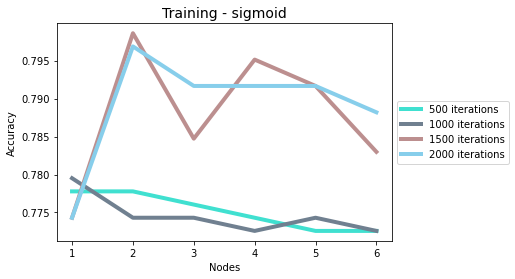


Testing Accuracy: sigmoid

|         |   learning rate |   500 iterations |   1000 iterations |   1500 iterations |   2000 iterations |
|:--------|----------------:|-----------------:|------------------:|------------------:|------------------:|
| 1 node  |               1 |         0.776042 |          0.760417 |          0.78125  |          0.78125  |
| 2 nodes |               1 |         0.78125  |          0.786458 |          0.786458 |          0.776042 |
| 3 nodes |               1 |         0.786458 |          0.770833 |          0.786458 |          0.78125  |
| 4 nodes |               1 |         0.786458 |          0.786458 |          0.776042 |          0.78125  |
| 5 nodes |               1 |         0.78125  |          0.786458 |          0.776042 |          0.776042 |
| 6 nodes |               1 |         0.78125  |          0.791667 |          0.776042 |          0.776042 | 



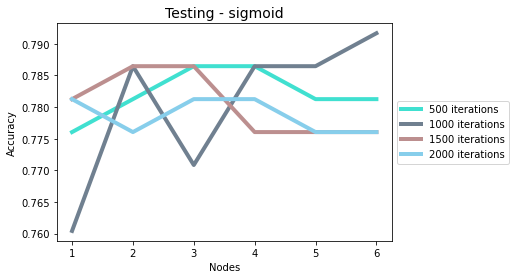


Training Accuracy: tanh

|         |   learning rate |   500 iterations |   1000 iterations |   1500 iterations |   2000 iterations |
|:--------|----------------:|-----------------:|------------------:|------------------:|------------------:|
| 1 node  |               1 |         0.774306 |          0.776042 |          0.774306 |          0.774306 |
| 2 nodes |               1 |         0.791667 |          0.793403 |          0.770833 |          0.789931 |
| 3 nodes |               1 |         0.789931 |          0.784722 |          0.810764 |          0.810764 |
| 4 nodes |               1 |         0.786458 |          0.807292 |          0.795139 |          0.824653 |
| 5 nodes |               1 |         0.795139 |          0.822917 |          0.826389 |          0.802083 |
| 6 nodes |               1 |         0.798611 |          0.803819 |          0.8125   |          0.822917 | 



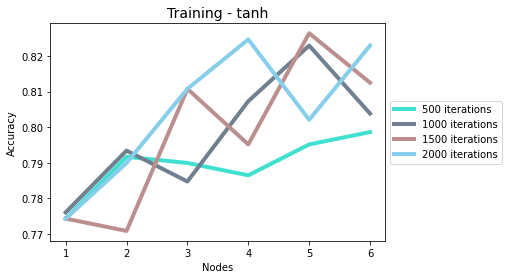


Testing Accuracy: tanh

|         |   learning rate |   500 iterations |   1000 iterations |   1500 iterations |   2000 iterations |
|:--------|----------------:|-----------------:|------------------:|------------------:|------------------:|
| 1 node  |               1 |         0.786458 |          0.786458 |          0.786458 |          0.786458 |
| 2 nodes |               1 |         0.796875 |          0.78125  |          0.770833 |          0.786458 |
| 3 nodes |               1 |         0.786458 |          0.739583 |          0.786458 |          0.739583 |
| 4 nodes |               1 |         0.78125  |          0.770833 |          0.807292 |          0.760417 |
| 5 nodes |               1 |         0.776042 |          0.791667 |          0.744792 |          0.776042 |
| 6 nodes |               1 |         0.791667 |          0.765625 |          0.760417 |          0.765625 | 



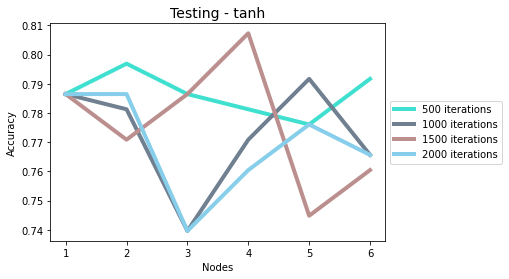


Training Accuracy: relu

|         |   learning rate |   500 iterations |   1000 iterations |   1500 iterations |   2000 iterations |
|:--------|----------------:|-----------------:|------------------:|------------------:|------------------:|
| 1 node  |               1 |         0.772569 |          0.774306 |          0.774306 |          0.774306 |
| 2 nodes |               1 |         0.765625 |          0.779514 |          0.779514 |          0.777778 |
| 3 nodes |               1 |         0.784722 |          0.786458 |          0.779514 |          0.782986 |
| 4 nodes |               1 |         0.786458 |          0.803819 |          0.789931 |          0.779514 |
| 5 nodes |               1 |         0.793403 |          0.809028 |          0.805556 |          0.796875 |
| 6 nodes |               1 |         0.786458 |          0.789931 |          0.805556 |          0.817708 | 



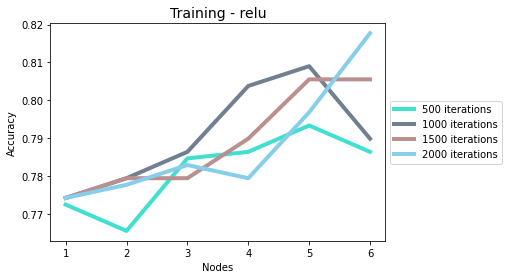


Testing Accuracy: relu

|         |   learning rate |   500 iterations |   1000 iterations |   1500 iterations |   2000 iterations |
|:--------|----------------:|-----------------:|------------------:|------------------:|------------------:|
| 1 node  |               1 |         0.765625 |          0.765625 |          0.765625 |          0.765625 |
| 2 nodes |               1 |         0.817708 |          0.770833 |          0.770833 |          0.776042 |
| 3 nodes |               1 |         0.78125  |          0.770833 |          0.770833 |          0.78125  |
| 4 nodes |               1 |         0.786458 |          0.786458 |          0.791667 |          0.796875 |
| 5 nodes |               1 |         0.776042 |          0.786458 |          0.78125  |          0.796875 |
| 6 nodes |               1 |         0.786458 |          0.786458 |          0.786458 |          0.776042 | 



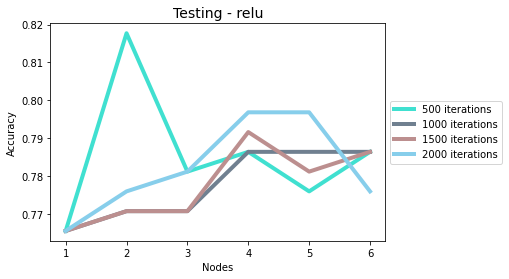

In [ ]:
learning_rate = 1
best_accuracy = {'accuracy': -1, 'activation_function': '', 'num_iterations': 0, 'nodes': 0}

accuracies_1_layer = {} # {'activation': {'train': accuracy_list, 'test': accuracy_list}}

for activation_function in activation_functions_dict.keys(): # activation function

  # accuracy data frames
  train_accuracy_1_layer = pd.DataFrame()
  test_accuracy_1_layer = pd.DataFrame()

  # learning rate column
  train_accuracy_1_layer['learning rate'] = [learning_rate] * 6
  test_accuracy_1_layer['learning rate'] = [learning_rate] * 6

  for num_iterations in range(500, 2001, 500): # number of iterations

    # accuracy lists
    train_accuracy_for_num_iterations = []
    test_accuracy_for_num_iterations = []

    for n_h in range(1, 7): # number of neurons in the hidden layer
      
      # nn model
      costs = []
      parameters, costs = nn_model(X_train, Y_train, num_iterations, learning_rate, n_h, activation_function)

      # train accuracy
      Y_train_predict = predict(X_train, parameters, activation_function)
      train_accuracy_for_num_iterations += [prediction_accuracy(Y_train_predict, Y_train)]

      # test accuracy
      Y_test_predict = predict(X_test, parameters, activation_function)
      accuracy = prediction_accuracy(Y_test_predict, Y_test)
      test_accuracy_for_num_iterations += [accuracy]

      # update the best accuracy
      if accuracy > best_accuracy['accuracy']:
        best_accuracy['accuracy'] = accuracy
        best_accuracy['activation_function'] = activation_function
        best_accuracy['num_iterations'] = num_iterations
        best_accuracy['nodes'] = n_h


    # add columns to data frames
    train_accuracy_1_layer['%i iterations' % num_iterations] = train_accuracy_for_num_iterations
    test_accuracy_1_layer['%i iterations' % num_iterations] = test_accuracy_for_num_iterations    

  # add row names
  train_accuracy_1_layer.index = ['1 node'] + ['%i nodes' % nodes for nodes in range(2, 7)]
  test_accuracy_1_layer.index = ['1 node'] + ['%i nodes' % nodes for nodes in range(2, 7)]

  # print data frames and plots
  print_data_frame(activation_function, "Training", train_accuracy_1_layer)
  print_plot(activation_function, "Training", train_accuracy_1_layer)
  print_data_frame(activation_function, "Testing", test_accuracy_1_layer)
  print_plot(activation_function, "Testing", test_accuracy_1_layer)

  # save results
  accuracies_1_layer[activation_function] = {'train': train_accuracy_1_layer, 'test': test_accuracy_1_layer}


**Part A - Conclusion**

In [ ]:
print("\033[1m" + "One hidden layer: the best accuracy is %f, using the %s activation function, %i nodes and %i iterations. \033[0m"
% (best_accuracy['accuracy'], best_accuracy['activation_function'], best_accuracy['nodes'], best_accuracy['num_iterations']))

One hidden layer: the best accuracy is 0.817708, using the relu activation function, 2 nodes and 500 iterations. 


Conclusion: the best activation function is **relu**. So we will use it in both layers in part B.

##**Part B: Two Layers**

### Initialize:
We don't use inialize with zero as zero values can be bad as we discussed in class.
Instead we inialize with random numbers.

Initialize w and b for all layers according to the number of the features and number of neurons in the layers.

W should be initialized randomly to small values (otherwise, values at the activation functions could be at the flat part).

* n_x = number of input features

* n_h = number of neurons in the hidden layers

* n_y = number of output


In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    return {
        
    # first hidden layer (x*h)
    "W1": np.random.randn(n_h, n_x) * 0.01,
    "b1": np.zeros([n_h, 1]),

    # second hidden layer (h*h)
    "W2": np.random.randn(n_h, n_h) * 0.01,
    "b2": np.zeros([n_h, 1]),

    # output layer (h*y)
    "W3": np.random.randn(n_y, n_h) * 0.01,
    "b3": np.zeros([n_y, 1])
    }

### Forward Propagate:

* X - input (samples * features)
* parameters - dictionary containing parameters (output of initialization function)
* activation_function - one of the activation function: sigmoid, tanh or relu
* A3 - The sigmoid output of the third activation
* cache - dictionary containing "Z1", "A1", "Z2", "A2", "Z3" and "A3"

Retuns: A3 (the final value) and the cache of values

In [ ]:
def forward_propagation(X, parameters, activation_function):
    
    # First Hidden Layer
    Z1 = parameters["W1"].dot(X) + parameters["b1"]
    A1 = activation_functions_dict[activation_function][0](Z1) # the first value at the list is the activation function
    
    # Second Hidden Layer
    Z2 = parameters["W2"].dot(A1) + parameters["b2"]
    A2 = activation_functions_dict[activation_function][0](Z2) # the first value at the list is the activation function

    # Output Layer
    Z3 = parameters["W3"].dot(A2) + parameters["b3"]
    A3 = sigmoid(Z3) # the output layer always uses sigmoid
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2,
        "Z3": Z3,
        "A3": A3
    }
    
    return A3, cache

### Backward Propagate:

* parameters - dictionary containing parameters (output of initialization function)
* cache - dictionary containing "Z1", "A1", "Z2", "A2", "Z3" and "A3"
* X - samples
* Y - classes
* activation_function - one of the activation function: sigmoid, tanh or relu

In [ ]:
def backward_propagation(parameters, cache, X, Y, activation_function):
    m = X.shape[1] # number of samples
    
    # Output Layer
    dA3 =  -1 * (Y - cache["A3"]) # derivative of MSE is -(Y-YP) (derivative of cost)
    dZ3 = dA3 * sigmoid_der(cache["Z3"]) # output derivative * node derivative, the output layer always uses sigmoid
    dW3 = (1 / m) * np.dot(dZ3, cache["A2"].T)
    db3 = (1 / m) * np.sum(dZ3)

    # Second Hidden Layer
    dA2 = np.dot(parameters["W3"].T, dZ3)
    dZ2 = dA2 * activation_functions_dict[activation_function][1](cache["Z2"]) # the second value at the list is the derivative of the activation function
    dW2 = (1 / m) * np.dot(dZ2, cache["A1"].T)
    db2 = (1 / m) * np.sum(dZ2)

    # First Hidden Layer
    dA1 = np.dot(parameters["W2"].T, dZ2)
    dZ1 =  dA1 * activation_functions_dict[activation_function][1](cache["Z1"])  # the second value at the list is the derivative of the activation function
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1)
    
    return {"dW1": dW1, "dW2": dW2, "dW3": dW3, "db1": db1, "db2": db2, "db3": db3}

### Update the weights:

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    return {
        
    "W1": parameters["W1"] - learning_rate * grads["dW1"],
    "W2": parameters["W2"] - learning_rate * grads["dW2"],
    "W3": parameters["W3"] - learning_rate * grads["dW3"],

    "b1": parameters["b1"] - learning_rate * grads["db1"],
    "b2": parameters["b2"] - learning_rate * grads["db2"],
    "b3": parameters["b3"] - learning_rate * grads["db3"],
}

### nn_model(X, Y, num_iterations, learning_rate): d
Builds the nn model by calling the functions implemented above
* X_train -- training set represented by a numpy array of shape (number of features, m_train)
* Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
* X_test -- test set represented by a numpy array of shape (number of features, m_test)
* Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
* num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
* learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
* n_h -- number of neurons in the hidden layer.
* activation_function - one of the activation function: sigmoid, tanh or relu.
* d -- dictionary containing information about the model. 


In [ ]:
def nn_model(X, Y, iterations, lr, n_h, activation_function):
    
    n_x = X.shape[0] # number of input features
    n_y = 1 # number of output

    parameters = initialize_parameters(n_x ,n_h, n_y)
    
    for i in range(iterations):
        A3, cache = forward_propagation(X, parameters, activation_function)
        cost = MSE_calculation(A3, Y)
        grads = backward_propagation(parameters, cache, X, Y, activation_function)
        parameters = update_parameters(parameters, grads, lr)
        costs.append(cost)
    return parameters, costs

### predict(X, parameters): Y_prediction

In [ ]:
def predict(X, parameters, activation_function):
    A3, cache = forward_propagation(X, parameters, activation_function)
    return np.rint(A3)

def prediction_accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true)

###Run the model with two hidden layers:


Training Accuracy: relu

|         |   learning rate |   500 iterations |   1000 iterations |   1500 iterations |   2000 iterations |
|:--------|----------------:|-----------------:|------------------:|------------------:|------------------:|
| 1 node  |               1 |         0.642361 |          0.642361 |          0.770833 |          0.774306 |
| 2 nodes |               1 |         0.642361 |          0.642361 |          0.762153 |          0.776042 |
| 3 nodes |               1 |         0.642361 |          0.774306 |          0.777778 |          0.78125  |
| 4 nodes |               1 |         0.765625 |          0.788194 |          0.642361 |          0.791667 |
| 5 nodes |               1 |         0.642361 |          0.782986 |          0.767361 |          0.810764 |
| 6 nodes |               1 |         0.779514 |          0.795139 |          0.810764 |          0.795139 | 



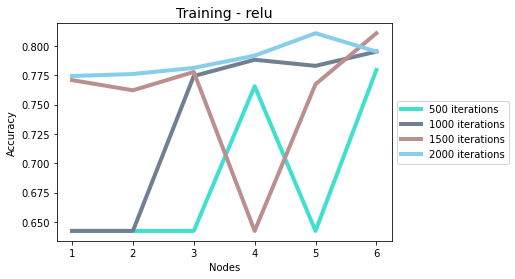


Testing Accuracy: relu

|         |   learning rate |   500 iterations |   1000 iterations |   1500 iterations |   2000 iterations |
|:--------|----------------:|-----------------:|------------------:|------------------:|------------------:|
| 1 node  |               1 |         0.677083 |          0.677083 |          0.807292 |          0.765625 |
| 2 nodes |               1 |         0.677083 |          0.677083 |          0.78125  |          0.776042 |
| 3 nodes |               1 |         0.677083 |          0.78125  |          0.796875 |          0.786458 |
| 4 nodes |               1 |         0.796875 |          0.776042 |          0.677083 |          0.786458 |
| 5 nodes |               1 |         0.677083 |          0.770833 |          0.776042 |          0.776042 |
| 6 nodes |               1 |         0.776042 |          0.796875 |          0.78125  |          0.796875 | 



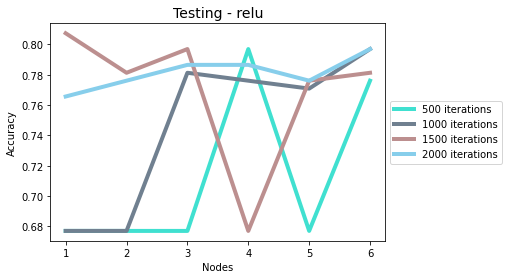

In [ ]:
# the best activation function that was found in part A
activation_function = best_accuracy['activation_function']

learning_rate = 1
best_accuracy = {'accuracy': -1, 'num_iterations': 0, 'nodes': 0}

# accuracy data frames
train_accuracy_2_layer = pd.DataFrame()
test_accuracy_2_layer = pd.DataFrame()

# learning rate column
train_accuracy_2_layer['learning rate'] = [learning_rate] * 6
test_accuracy_2_layer['learning rate'] = [learning_rate] * 6

for num_iterations in range(500, 2001, 500): # number of iterations

  # accuracy lists
  train_accuracy_for_num_iterations = []
  test_accuracy_for_num_iterations = []

  for n_h in range(1, 7): # number of neurons in the hidden layer
    
    # nn model
    costs = []
    parameters, costs = nn_model(X_train, Y_train, num_iterations, learning_rate, n_h, activation_function)

    # train accuracy
    Y_train_predict = predict(X_train, parameters, activation_function)
    train_accuracy_for_num_iterations += [prediction_accuracy(Y_train_predict, Y_train)]

    # test accuracy
    Y_test_predict = predict(X_test, parameters, activation_function)
    accuracy = prediction_accuracy(Y_test_predict, Y_test)
    test_accuracy_for_num_iterations += [accuracy]
    
    # update the best accuracy
    if accuracy > best_accuracy['accuracy']:
      best_accuracy['accuracy'] = accuracy
      best_accuracy['num_iterations'] = num_iterations
      best_accuracy['nodes'] = n_h

  # add columns to data frames
  train_accuracy_2_layer['%i iterations' % num_iterations] = train_accuracy_for_num_iterations
  test_accuracy_2_layer['%i iterations' % num_iterations] = test_accuracy_for_num_iterations    

# add row names
train_accuracy_2_layer.index = ['1 node'] + ['%i nodes' % nodes for nodes in range(2, 7)]
test_accuracy_2_layer.index = ['1 node'] + ['%i nodes' % nodes for nodes in range(2, 7)]

# print data frames and plots
print_data_frame(activation_function, "Training", train_accuracy_2_layer)
print_plot(activation_function, "Training", train_accuracy_2_layer)
print_data_frame(activation_function, "Testing", test_accuracy_2_layer)
print_plot(activation_function, "Testing", test_accuracy_2_layer)

**Part B - Conclusion**

In [ ]:
print("\033[1m" + "Two hidden layers with the %s activation function: the best accuracy is %f, using %i nodes and %i iterations. \033[0m"
% (activation_function, best_accuracy['accuracy'], best_accuracy['nodes'], best_accuracy['num_iterations']))

Two hidden layers with the relu activation function: the best accuracy is 0.807292, using 1 nodes and 1500 iterations. 


### Accuracy: single hidden layer vs. two hidden layers:

Here, we compare the accuracy range between one hidden layer and two hidden layers. Shown below are boxplots for the train and the test data. The plots show the results of the best activation function (here, relu) for all number of iterations and number of nodes.

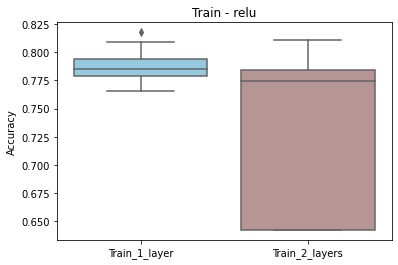

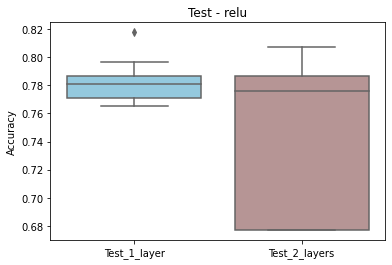

In [ ]:
# create wide-form data
# to_numpy() converts dataframe to array, flatten() converts multi-dimentionl array to list
data = pd.DataFrame({'Train_1_layer': accuracies_1_layer[activation_function]['train'].drop(['learning rate'], axis = 1).to_numpy().flatten(),
                     'Train_2_layers': train_accuracy_2_layer.drop(['learning rate'], axis = 1).to_numpy().flatten(),
                     'Test_1_layer': accuracies_1_layer[activation_function]['test'].drop(['learning rate'], axis = 1).to_numpy().flatten(),
                     'Test_2_layers': test_accuracy_2_layer.drop(['learning rate'], axis = 1).to_numpy().flatten()})

colors = ['skyblue', 'rosybrown']

# train accuracy of the best activation function - 1 hidden layer vs. 2 hidden layers
ax = sns.boxplot(data = data[['Train_1_layer', 'Train_2_layers']], palette = colors).set(title = 'Train - ' + activation_function, ylabel = 'Accuracy')
plt.show()

print('\n\n')

# test accuracy of the best activation function - 1 hidden layer vs. 2 hidden layers
sns.boxplot(data = data[['Test_1_layer', 'Test_2_layers']], palette = colors).set(title = 'Test - ' + activation_function, ylabel = 'Accuracy')
plt.show()


Conclusion: the accuracy is much better in a **one hidden layer model**: (1) The mean accuracy is bigger. (2) The range is smaller.